In [ ]:
#Entrega 7 Enric Sena Alvarez

In [103]:
#Exercici 1, Exercici 2, Exercici 4, Exercici 5
#Els faig alhora ja que considero que per fer els models em caldrà fer els processos que demanen tots junts.
import pandas as pd
import numpy as np

data=pd.read_csv('wineData.txt',sep=',',header=None)
data.columns=["class","Alcohol","Malic_acid","Ash","Alcalinity_of_ash","Magnessium","Total_phenols","Flavanoids","Nonflavanoid_phenols","Proacthocyanins","Color_intensity","Hue","OD280/OD315_of_diluted_wines","Proline"]
data.describe() # faig un analisi dels estadístics principals per veure un resum de les dades.


,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnessium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proacthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,1.94,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.78,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,1.00,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,1.00,12.36,1.60,2.21,17.20,88.00,1.74,1.21,0.27,1.25,3.22,0.78,1.94,500.50
50%,2.00,13.05,1.87,2.36,19.50,98.00,2.35,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,3.00,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,3.00,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


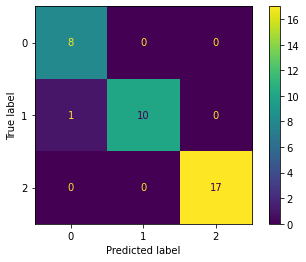

0.9722222222222222

In [74]:
# Exercici 1

from sklearn.model_selection import train_test_split

X=data.drop('class',axis=1)
y=data['class']

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=123)

## Decision trees.
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

confusion_trees=metrics.confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_trees)
cm_display.plot()
plt.show()
accuracy_trees=metrics.accuracy_score(y_test,y_pred)
accuracy_trees



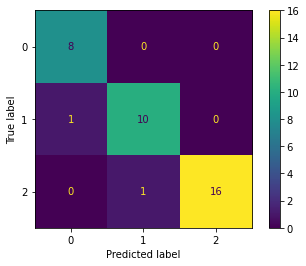

Accuracy: 0.9444444444444444


In [73]:
## SVM
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

confusion_svm=metrics.confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_svm)
cm_display.plot()
plt.show()


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
#Exercici 2:

#Veiem que el 1r model és millor a priori ja que te un accuracy més alt.


In [81]:
# Exercici 3
#Decision trees millorat:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

x=data.drop('class',axis=1)
y=data['class']

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

#Per algún motiu que desconec obtinc un valor del accuracy inferior al del model simple.

0.9103174603174603 {'max_depth': 4}


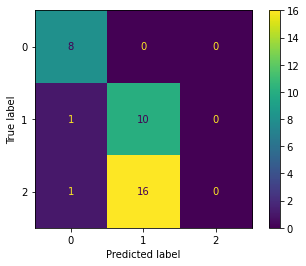

Accuracy: 0.5


In [89]:
#SVM millorat:

from sklearn import svm
clf=svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

confusion_svm=metrics.confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_svm)
cm_display.plot()
plt.show()


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
#En el cas del svm em sorpren no millorar el model canviant el Kernel ja que en principi el rbf o poly solen traçar millor les "linies" de separació entre classes.

In [94]:
# Exercici 4
#Decision trees 

from sklearn.model_selection import cross_val_score
clf=DecisionTreeClassifier()
scores=cross_val_score(clf,X,Y,cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.88 accuracy with a standard deviation of 0.05


In [95]:
#SVM
from sklearn.model_selection import cross_val_score
clf=svm.SVC(kernel='linear',C=1,random_state=42)
scores=cross_val_score(clf,X,Y,cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.04


In [105]:
# Exercici 5

#estandaritzo:
from sklearn import preprocessing

Stdscaler=preprocessing.StandardScaler().fit(data)
Scaled_data=Stdscaler.transform(data)

#normalitzo:

MinMax_Scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
data_normalized=MinMax_Scaler.fit_transform(Scaled_data)

data=data_normalized



AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [101]:
# Decision trees:

data=pd.DataFrame(data)
from sklearn.model_selection import train_test_split

X=data.drop('class',axis=1)
y=data['class']

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=123)

## Decision trees.
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

confusion_trees=metrics.confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_trees)
cm_display.plot()
plt.show()
accuracy_trees=metrics.accuracy_score(y_test,y_pred)
accuracy_trees

#No entenc perque em dona error si data és un data frame.

KeyError: "['class'] not found in axis"